In [3]:
!yes | pip uninstall ibmdbpy

You are using pip version 7.1.0, however version 8.1.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Uninstalling ibmdbpy-0.1.0b22:
  /gpfs/global_fs01/sym_shared/YPProdSpark/user/s3ec-148007c1249079-948fe09a4c8c/.local/lib/python2.7/site-packages/ibmdbpy-0.1.0b22.dist-info/DESCRIPTION.rst
  /gpfs/global_fs01/sym_shared/YPProdSpark/user/s3ec-148007c1249079-948fe09a4c8c/.local/lib/python2.7/site-packages/ibmdbpy-0.1.0b22.dist-info/METADATA
  /gpfs/global_fs01/sym_shared/YPProdSpark/user/s3ec-148007c1249079-948fe09a4c8c/.local/lib/python2.7/site-packages/ibmdbpy-0.1.0b22.dist-info/RECORD
  /gpfs/global_fs01/sym_shared/YPProdSpark/user/s3ec-148007c1249079-948fe09a4c8c/.local/lib/python2.7/site-packages/ibmdbpy-0.1.0b22.dist-info/WHEEL
  /gpfs/global_fs01/sym_shared/YPProdSpark/user/s3ec-148007c1249079-948fe09a4c8c/.local/lib/python2.7/site-packages/ibmdbpy-0.1.0b22.dist-info/metadata.json
  /gpfs/global_fs01/sym_shared/YPProdSpark/user/s3ec-14800

In [1]:
!pip install --user future
!pip install --user lazy
!pip install --user jaydebeapi
!pip install -Iv ibmdbpy==0.1.0b22 --user --no-deps
!wget -O $HOME/.local/lib/python2.7/site-packages/ibmdbpy/db2jcc4.jar https://ibm.box.com/shared/static/lmhzyeslp1rqns04ue8dnhz2x7fb6nkc.zip

You are using pip version 7.1.0, however version 8.1.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 7.1.0, however version 8.1.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 7.1.0, however version 8.1.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 7.1.0, however version 8.1.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Getting page https://pypi.python.org/simple/ibmdbpy/
  1 location(s) to search for versions of ibmdbpy:
  * https://pypi.python.org/simple/ibmdbpy/
  Getting page https://pypi.python.org/simple/ibmdbpy/
  Analyzing links from page https://pypi.python.org/simple/ibmdbpy/
    Found link https://pypi.python.org/packages/py2.py3/i/ibmdbpy/ibmdbpy-0.1.0b1-py2.py3-none-any.whl#md5=9d0121a3cc573bd516b9ee92dbf98191 (from https

In [2]:
!pip show ibmdbpy

You are using pip version 7.1.0, however version 8.1.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
---
Metadata-Version: 2.0
Name: ibmdbpy
Version: 0.1.0b22
Summary: A Pandas-like SQL-wrapper for in-database analytics with IBM dashDB/DB2.
Home-page: https://github.com/ibmdbanalytics/ibmdbpy
Author: IBM Corp.
Author-email: fouche@de.ibm.com
License: BSD
Location: /gpfs/global_fs01/sym_shared/YPProdSpark/user/s3ec-148007c1249079-948fe09a4c8c/.local/lib/python2.7/site-packages
Requires: future, pandas, numpy, six, pypyodbc, lazy


In [3]:
import requests, StringIO, pandas as pd, json, re
from pyspark.sql import SQLContext
from ibmdbpy import IdaDataBase, IdaDataFrame

In [4]:
# credentials for our dashDB service - remove before posting :)
credentials = {
    'port': '50000',
    'db': 'BLUDB',
    'username': 'xxxxxx',
    'jdbcurl': 'jdbc:db2://bluemix05.bluforcloud.com:50000/BLUDB',
    'password': 'xxxxxx'
}
DRIVER='{IBM DB2 ODBC DRIVER - IBMDBCL1}';
DATABASE='BLUDB';
HOSTNAME='bluemix05.bluforcloud.com';
PORT='50000';
PROTOCOL='TCPIP';
UID='dash0xxxxx';
PWD='xxxxxxxx';

In [5]:
jdbc=credentials['jdbcurl']+":user="+credentials['username']+";password="+credentials['password']
print jdbc
idadb=IdaDataBase(dsn=jdbc)

jdbc:db2://bluemix05.bluforcloud.com:50000/BLUDB:user=xxxxxxx;password=xxxxx


In [10]:
visitor_query='select v.year,v.visitors1,sum(w.precip_hieght) as rain,sum(w.sunshine_duration) as sun,max(w.temp_max) as tmax,min(w.temp_min) as tmin from '+credentials['username']+ "."     +"CEBIT_VISITORS as v,"+credentials['username'] + ".WEATHER_HANNOVER w where v.year<2016"+      " and w.mdate between v.begin and v.end group by v.year,v.visitors1"
weather_query="(select w.mdate,w.sunshine_duration as sun,w.precip_hieght as rain,w.temp_max as tmax,w.temp_min as tmin from "+credentials['username'] + "." + "CEBIT_VISITORS as v,"+credentials['username'] + ".WEATHER_HANNOVER w where w.mdate between v.begin and v.end and v.year<2016 order by w.mdate asc)"
visitor_df=idadb.ida_query(visitor_query)
weather_df=idadb.ida_query(weather_query)

In [16]:
weather_df.columns

Index([u'MDATE', u'SUNSHINE_DURATION', u'PRECIP_HIEGHT', u'TEMP_MAX', u'TEMP_MIN'], dtype='object')

In [11]:
%matplotlib inline 

CeBIT visitors by year:


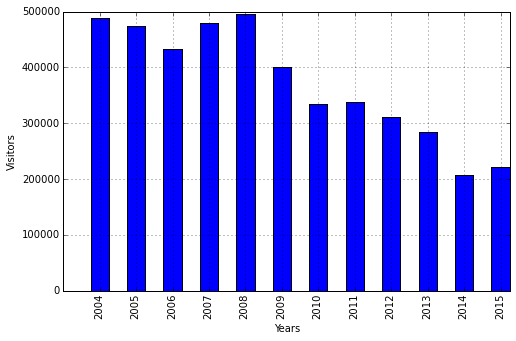

In [12]:
print "CeBIT visitors by year:"
ax = visitor_df.plot(kind='bar', figsize=(8,5), x='YEAR', y='VISITORS1')
ax.set_ylabel("Visitors")
ax.set_xlabel("Years");

Basic weather data for past CeBIT days


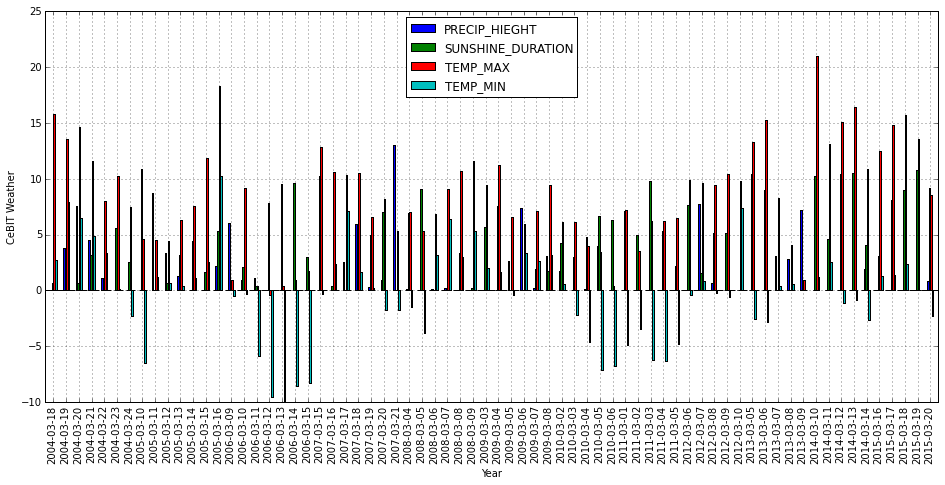

In [17]:
print "Basic weather data for past CeBIT days"
wdf1=weather_df[['MDATE','PRECIP_HIEGHT','SUNSHINE_DURATION','TEMP_MAX','TEMP_MIN']]
ax2 = wdf1.plot(kind='bar', figsize=(16,7), x='MDATE' )
ax2.set_ylabel("CeBIT Weather")
ax2.set_xlabel("Year")

Our final plot shows the visitor and weather data in context - any relationship?


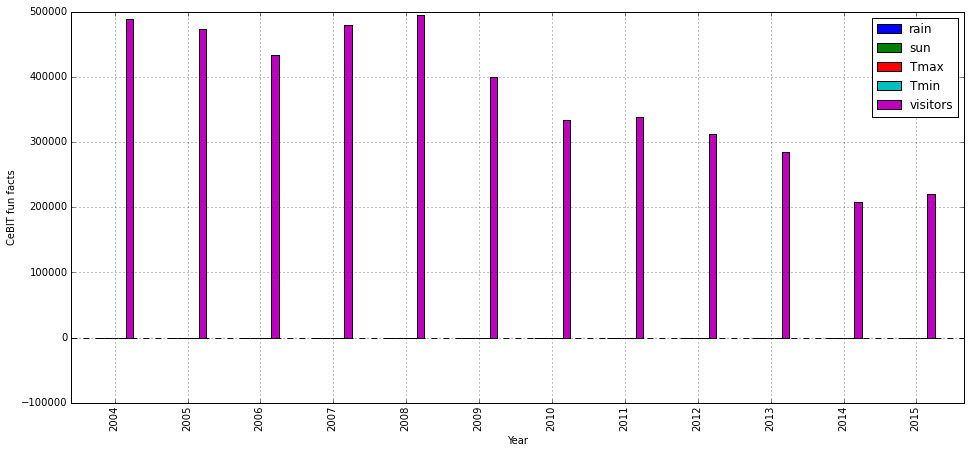

In [22]:
print "Our final plot shows the visitor and weather data in context - any relationship?"
vis1=visitor_df[['YEAR','RAIN','SUN','TMAX','TMIN','VISITORS1']]
ax = vis1.plot(kind='bar', figsize=(16,7), x='YEAR', legend=False )
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, ['rain','sun','Tmax','Tmin','visitors'], loc='best')
ax.set_ylabel("CeBIT fun facts")
ax.set_xlabel("Year")